# Covid Rates

## Introduction

For my metric, I went in depth on the Covid rates for the past two years in each neighborhood. The disease can have harmful effects on children, and would make it a worse place to raise a child

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

In [4]:
covid = pd.read_csv("covid_statistics.csv")
covid.head(221)

,neighborhood_municipality,infections,reinfections,deaths,hospitalizations,pcr_tests,positive_pcr_tests,update_date
0,Aleppo,1557,34,15,19,2312,227,2022-04-04
1,Allegheny Center (Pittsburgh),1181,80,5,14,2520,327,2022-04-04
2,Allegheny West (Pittsburgh),392,61,0,5,977,92,2022-04-04
3,Allentown (Pittsburgh),2294,176,2,33,3934,534,2022-04-04
4,Arlington (Pittsburgh),1736,216,9,29,3329,413,2022-04-04
...,...,...,...,...,...,...,...,...
216,Whitehall,19177,1473,74,188,31416,3207,2022-04-04
217,Wilkins,5344,330,15,80,10595,1156,2022-04-04
218,Wilkinsburg,14323,1215,48,271,31241,3132,2022-04-04
219,Wilmerding,1752,168,4,29,2814,356,2022-04-04


In [ ]:
lowestCases = {}
for key in lowHigh:
    if lowHigh[key] <= mean:
        lowestCases[key] = lowToHigh[key]



In [5]:
##Searches for the number of infections and the number of tests to find the percentage of infections per test taken.
##Filters out cities that don't have "(Pittsburgh)" in the name
infPerPCR = {}

for i in covid.index:
    if "Pittsburgh" in covid["neighborhood_municipality"][i]:
        negative_tests = covid["pcr_tests"][i]
        
        infPerPCR[covid["neighborhood_municipality"][i]] = (covid["infections"][i] + covid["reinfections"][i])/negative_tests
        infPerPCR[covid["neighborhood_municipality"][i]] = round(infPerPCR[covid["neighborhood_municipality"][i]], 4)

##Sorts the list from the lowest pecent to the highest
lowToHigh = {k: v for k, v in sorted(infPerPCR.items(), key = lambda v: v[1])}

In [7]:
##Setting data variables to allow for each 
data = []

for key, value in lowToHigh.items():
    data = data + [value]
    
median = np.median(data)
std = np.std(data, ddof=0)
mean = np.mean(data)

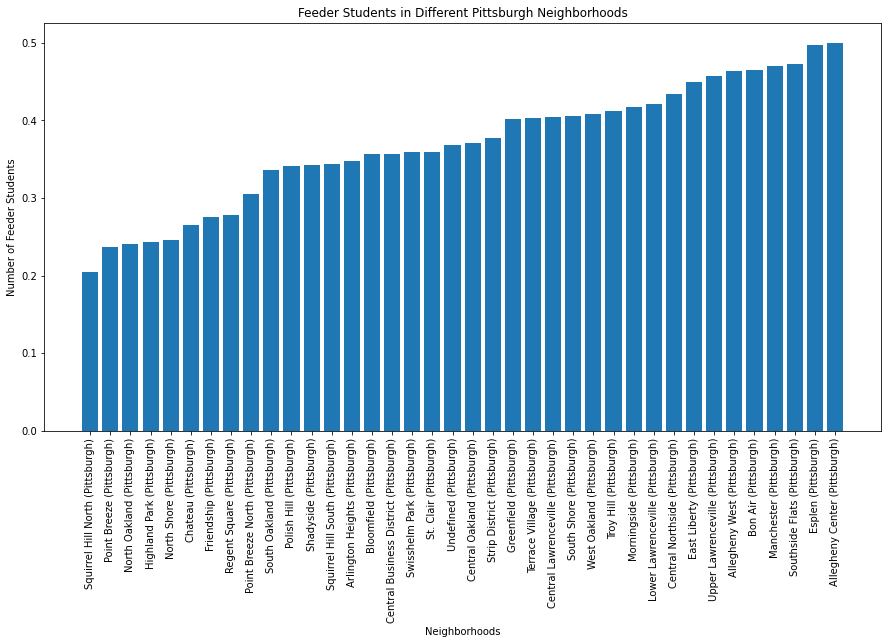

In [11]:
lowestRates = {}
for key in lowToHigh:
    if lowToHigh[key] <= mean:
        lowestRates[key] = lowToHigh[key]

a = lowestRates.items()
x, y = zip(*a)
plt.figure(figsize=(15,7.5))
plt.xlabel("Neighborhoods")
plt.ylabel("Number of Feeder Students")
plt.title("Feeder Students in Different Pittsburgh Neighborhoods")
plt.xticks(rotation=90)
plt.bar(x, y)
plt.show()

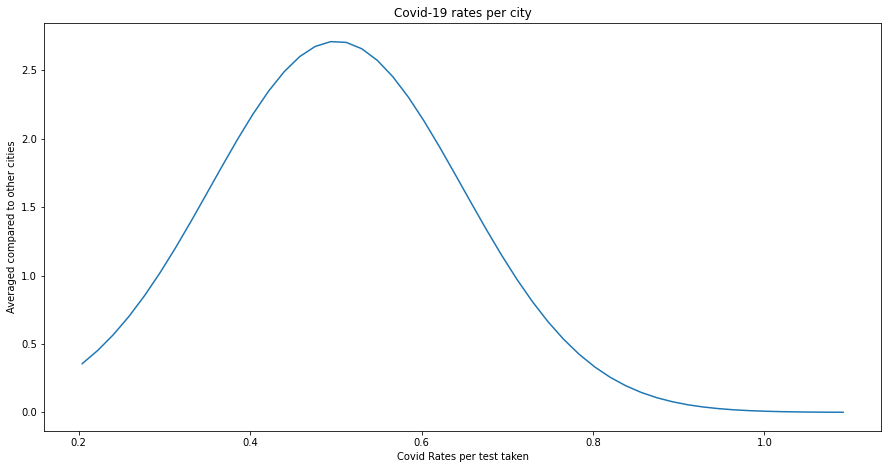

The rate at which people are infected with COVID-19 in Carrick is: 0.556


In [7]:
plt.figure(figsize=(15,7.5))
domain = np.linspace(np.min(data), np.max(data))
plt.plot(domain, norm.pdf(domain, mean, std))
plt.title("Covid-19 rates per city")
plt.xlabel("Covid Rates per test taken")
plt.ylabel("Averaged compared to other cities")
plt.show()

print("The rate at which people are infected with COVID-19 in Carrick is: " + str(infPerPCR["Carrick (Pittsburgh)"]))


## Conclusion

The top 5 of my data were Squirrel Hill North, Point Breeze, North Oakland, Highland Park, North Shore